# Map of sub-domain of ANHA12

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import cmocean
import pickle

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
imin, imax = 1479, 2179
jmin, jmax = 159, 799

# Resolution of grid cells to show in figure:
grid_reso = 10

# Colors:
land_color         = '#a9a7a2'
land_outline_color = '#373736'

#### Load files:

In [3]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

#### Figure:

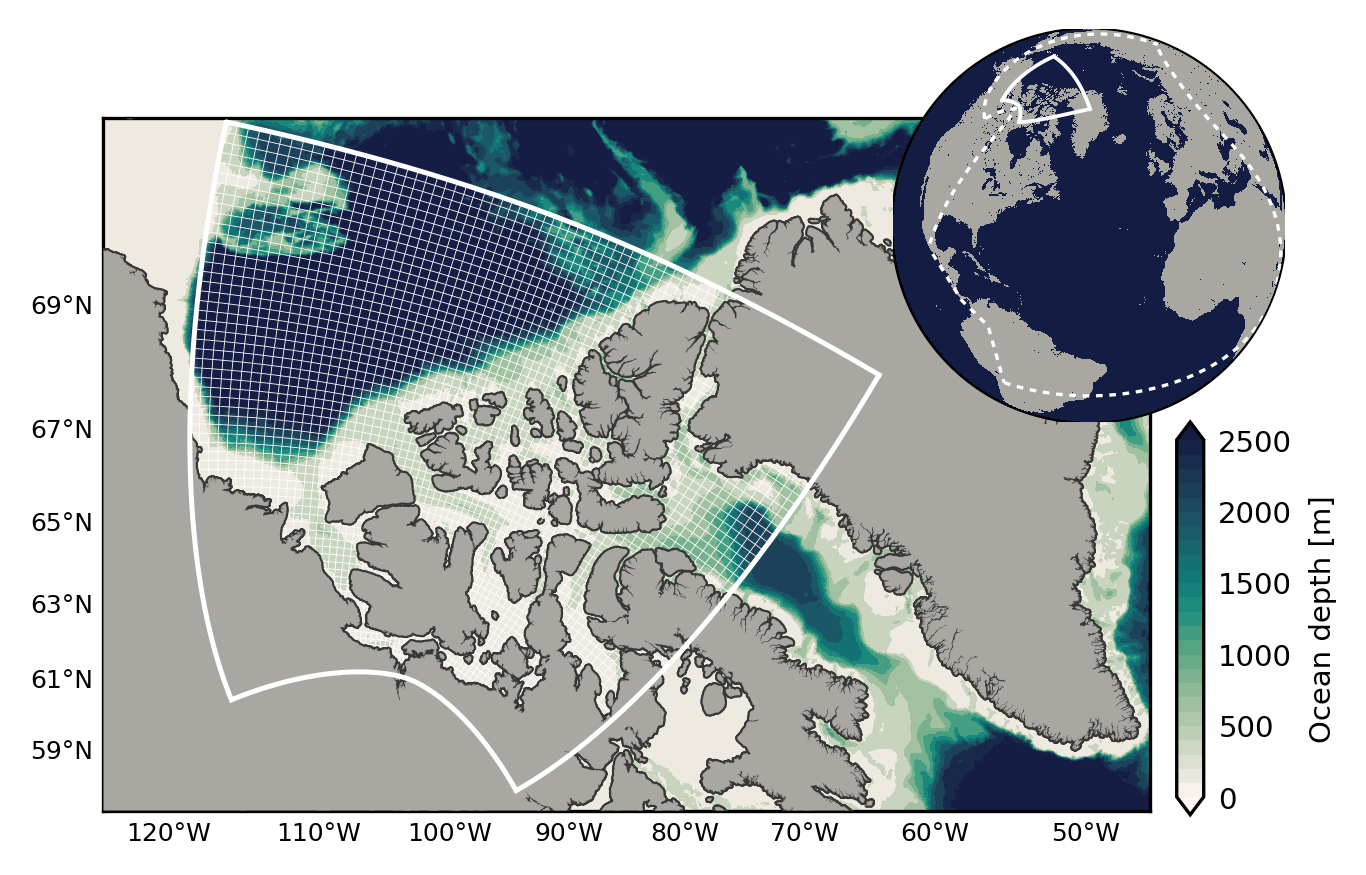

In [25]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/M1-surface-globe.pickle','rb'))

# Globe: --------------------------------------------------------------------------------------
x, y  = proj2(mesh_lon, mesh_lat) 

bathy_array = np.zeros_like(mesh_bathy)
bathy_array[0] = -1
bathy_array[1] = 2501
bath = proj2.contourf(x, y, bathy_array, 25, cmap=cmocean.cm.tempo, vmin=0, vmax=2500, zorder=1, extend='both')
# bath = proj2.pcolormesh(x, y, mesh_bathy, cmap=cmocean.cm.tempo, vmin=0, vmax=2500, zorder=1)

# Sub-domain
proj2.plot(x[imin:imax,jmin], y[imin:imax,jmin], 'w-', lw=0.9, zorder=3)
proj2.plot(x[imin:imax,jmax], y[imin:imax,jmax], 'w-', lw=0.9, zorder=3)
proj2.plot(x[imin,jmin:jmax], y[imin,jmin:jmax], 'w-', lw=0.9, zorder=3)
proj2.plot(x[imax,jmin:jmax], y[imax,jmin:jmax], 'w-', lw=0.9, zorder=3)
# full domain
proj2.plot(x[460:-1:grid_reso,0]   , y[460:-1:grid_reso,0]        , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[0,370:-1:grid_reso]   , y[0,370:-1:grid_reso]        , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[100:-1:grid_reso,-1]  , y[100:-1:grid_reso,-1]       , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[-1,0:-1:grid_reso]    , y[-1,0:-1:grid_reso]         , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
xline_add = [x[500,0], x[700,70], x[1100,0], x[0,370]]
yline_add = [y[240,-1], y[85,-80], y[80,0], y[0,370]]
proj2.plot(xline_add, yline_add, 'w--', lw=0.8, zorder=3, dashes=(2, 2))


# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax]  , 'w-', lw=1.2, zorder=5)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin]  , 'w-', lw=1.2, zorder=5)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax]  , 'w-', lw=1.2, zorder=5)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax]  , 'w-', lw=1.2, zorder=5)

proj1.plot(x_sub[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso], \
           y_sub[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso], 'w-', lw=0.2, zorder=3);
proj1.plot(x_sub[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso].T, \
           y_sub[imin:imax+grid_reso:grid_reso,jmin:jmax+grid_reso:grid_reso].T, 'w-', lw=0.2, zorder=3);

proj1.drawcoastlines(color=land_outline_color, linewidth=1.0, zorder=4)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=4);


# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.19, 0.02, 0.35]);
CBar   = plt.colorbar(bath, ax=ax1, cax=cbaxes, ticks=[0,500,1000,1500,2000,2500]); 
CBar.set_label('Ocean depth [m]', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202204/M1-sub-domain.jpg', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202204/M1-sub-domain.svg', bbox_inches='tight', format='svg', dpi=300)